In [83]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot
import cufflinks as cf
import mplfinance as mpf


In [84]:
filename_1d = "..\\..\\data\\moex\\SBER_200101_240530.csv"
filename_1h = "..\\..\\data\\moex\\SBER_240205_240603.csv"

dtype={
    '<TICKER>': 'string',
    '<PER>': 'string',
    '<DATE>': 'string',
    '<TIME>': 'string',
    '<OPEN>': 'float',
    '<HIGH>': 'float',
    '<LOW>': 'float',
    '<CLOSE>': 'float',
    '<VOLUME>': 'float',
}

df = pd.read_csv(filename_1d, delimiter=";", decimal=".", dtype=dtype)
df['timestamp'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'], format='%y%m%d %H%M%S')
df.drop(['<DATE>', '<TIME>', '<PER>', '<TICKER>'], axis=1, inplace=True)
df.set_index('timestamp', inplace=True)
df.rename(columns= {'<OPEN>' : 'open', '<HIGH>' : 'high', '<LOW>' : 'low', '<CLOSE>' : 'close', '<VOL>' : 'volume'}, inplace=True)
df

,open,high,low,close,volume
timestamp,,,,,
2020-01-03,255.97,258.19,253.70,255.00,35824160
2020-01-06,254.75,254.84,251.40,253.90,22327940
2020-01-08,253.62,259.15,253.03,259.15,40736030
2020-01-09,259.41,261.76,257.01,257.99,38196300
2020-01-10,257.91,259.25,256.88,258.19,18841650
...,...,...,...,...,...
2024-05-27,321.08,321.95,315.50,317.09,45678990
2024-05-28,317.49,320.90,315.82,318.22,30148450
2024-05-29,318.40,320.40,315.92,320.38,22961680


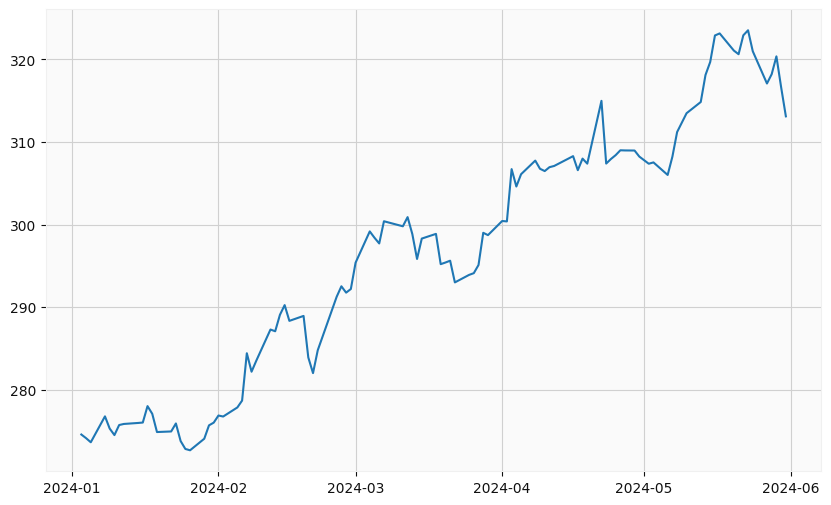

In [85]:
plt.figure(figsize=(10, 6))
dt = df[datetime(2024, 1, 1):]
plt.plot(dt.close, '-', label='close')
plt.show()

In [86]:
# https://github.com/santosjorge/cufflinks
cf.go_offline()
qf = cf.QuantFig(dt, title="SBER Stock Price", legend="top", name="SBER stock prices" )
#qf.add_volume()
#qf.add_bollinger_bands()
#qf.add_sma(periods=20, column="close", color="red")
#qf.add_ema(periods=20, color="green")

qf.iplot()

In [87]:
# https://github.com/plotly/plotly.py
fig = go.Figure(data=go.Candlestick(x=dt.index, open=dt.open, high=dt.high, low=dt.low, close=dt.close))
fig.update_layout(title="SBER stock prices", yaxis_title="Price (RUR)")
fig.show()


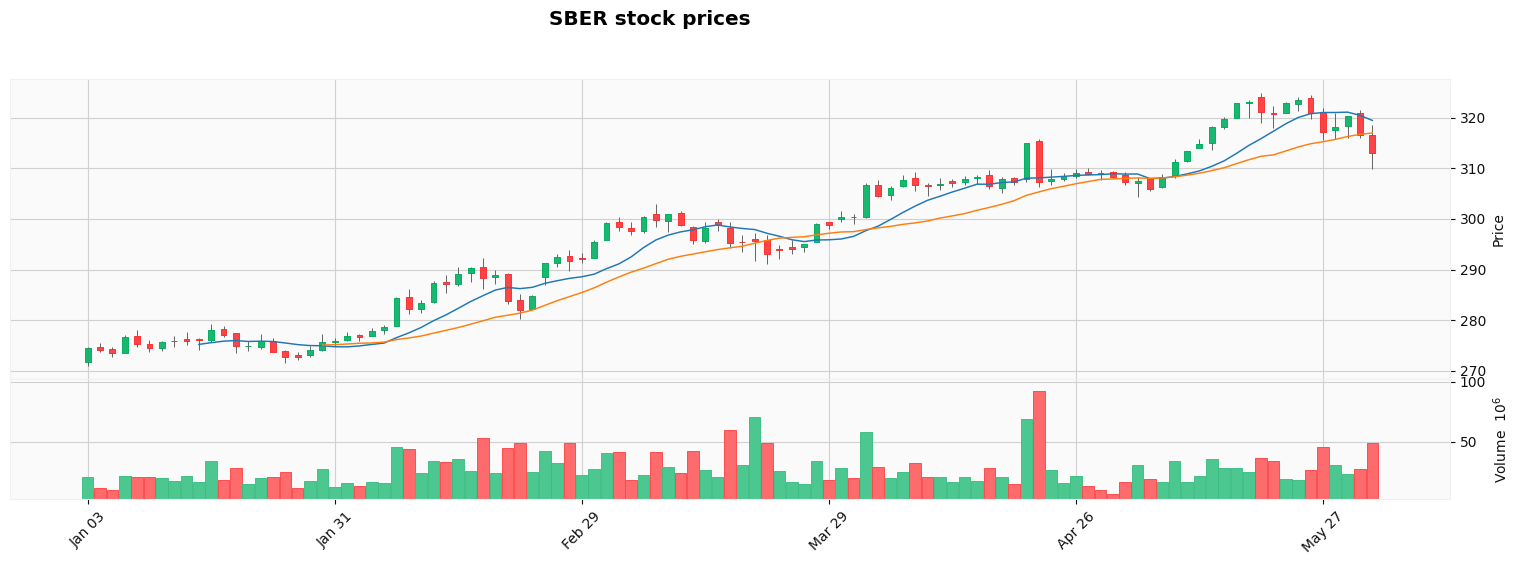

In [89]:
# https://github.com/matplotlib/mplfinance
# https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb

mpf.plot(dt, type="candle", mav=(10, 20), volume=True, style="yahoo", title="SBER stock prices", figsize=(20, 6))